# Face Classification with OpenCV and Georgia Tech sample faces dataset

In this project, the objective is to explore the facial recognition techniques Eigenfaces (1991), Local Binary Patterns Histograms (LBPH)(1996) and Fisherfaces (1997) using the OpenCV library.

The dataset contains 15 images of 50 individuals from different angles, facial expressions, and lighting and scaling conditions, totaling 750 images. All images are in JPEG format and in varying sizes.

Out of 15 images per person, 10 were used for training and 5 for testing.
In total, there were 500 images for training and 250 for testing.

The dataset can be downloaded [here](https://www.researchgate.net/figure/Sample-faces-from-Georgia-Tech-Face-database_fig1_272195669).

If you want to learn about how the algorithms work, click [here](https://www.baseapp.com/deepsight/a-comprehensive-guide-to-facial-recognition-algorithms/).

Credits to [Alura's Technology school](https://cursos.alura.com.br/formacao-visao-computacional-opencv) for the Computer Vision courses.


***
## Importing libs

In [1]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np
from sklearn.metrics import accuracy_score
from datetime import datetime

***
## Preprocessing the dataset

In [2]:
#returns a list with all images of a directory
def read_dir(path):
    lstFaces = [f for f in listdir(path) if isfile(join(path, f))]
    return lstFaces

#read images in rgb and grayscale
def img_reader(img_dir, size=(200,200)):
    img_rgb = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb, size, interpolation=cv2.INTER_LANCZOS4)
    
    img_gray = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, size, interpolation=cv2.INTER_LANCZOS4)
    
    return img_rgb, img_gray

In [3]:
#reading all files from Georgia Tech sample faces folder
gt_dir = 'Imagens/georgia-tech-faces/'
lstImgs = read_dir(gt_dir)
path_train = 'Imagens/georgia-tech-faces/train/'
path_test = 'Imagens/georgia-tech-faces/test/'

#Creating directory if it doesn't exist
if not path.exists(path_train):
    makedirs(path_train)
if not path.exists(path_test):
    makedirs(path_test)

    
#splitting data into train and test (10 for train, 5 to test for every person)
for f in lstImgs:
    person = f[1:3]
    num = f[4:6]

    if int(num) <= 10:
        shutil.copyfile(gt_dir + f, path_train + f)
    else:
        shutil.copyfile(gt_dir + f, path_test + f)
        

In [4]:
lstTrain = read_dir(path_train)
lstTest = read_dir(path_test)

training_data, training_person = [], []

for i, f in enumerate(lstTrain):
    _, img = img_reader(path_train + f)
    training_data.append(img)
    training_person.append(int(f[1:3]))
    
test_data, test_person = [], []

for i, f in enumerate(lstTest):
    _, img = img_reader(path_test + f)
    test_data.append(img)
    test_person.append(int(f[1:3]))

***
## Visualizing the data

In [5]:
def plot_lst(path,lstImgs, s=(18,8)):
    r,c,x,y = round(len(lstImgs)/10)+1, 10, 0, 0
    fig, ax = plt.subplots(r, c)
    fig.set_size_inches(s)
    
    for imgP in lstImgs:
        img , _ = img_reader(path + imgP)
        #print(img)
        ax[x][y].axis('off')
        ax[x][y].imshow(img)
        y+=1
        if (y==10):
            y = 0
            x+=1
    #cleaning the remaining axes
    while (x!=r-1) or (y!=c):
        ax[x][y].axis('off')
        y+=1
        if (y==10):
            y = 0
            x+=1
        if (x==r):
            break

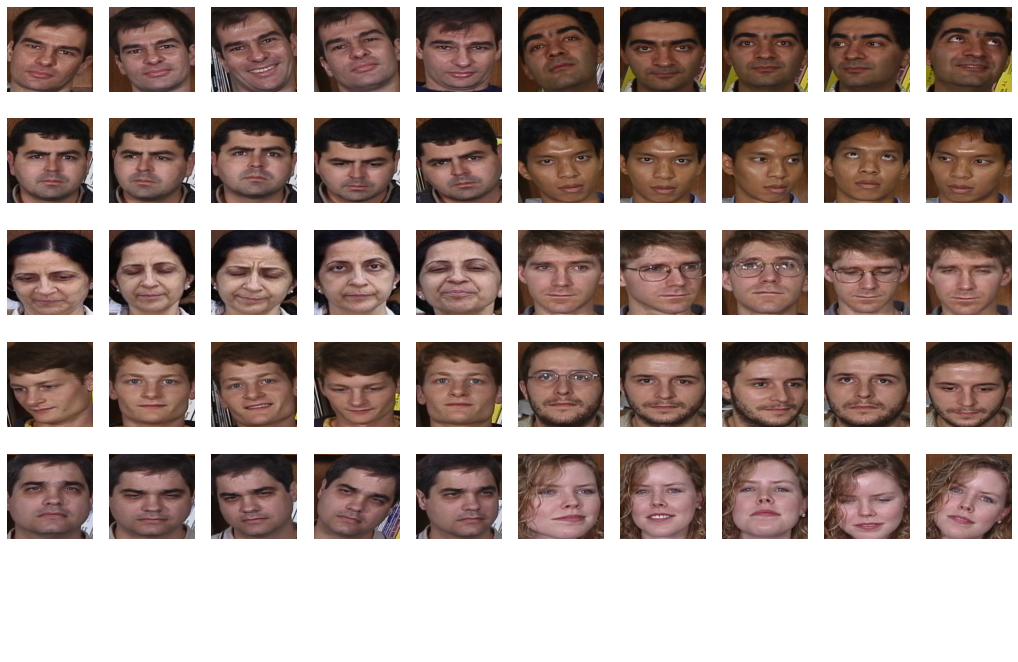

In [6]:
path = 'Imagens/georgia-tech-faces/test/'
plot_lst(path, read_dir(path)[:50],(18,12))

***

## Classification algorithms

### Eigenfaces

In [7]:
#training model
y_train = np.asarray(training_person, dtype=np.int32)
y_test = np.asarray(test_person, dtype=np.int32)


t1 = datetime.now()
eigenfaces = cv2.face.EigenFaceRecognizer_create()
eigenfaces.train(training_data, y_train)
t2 = datetime.now()

print('Trained model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))

Trained model. The training process lasted 25.567519 seconds.


#### Trying to predict using Eigenfaces

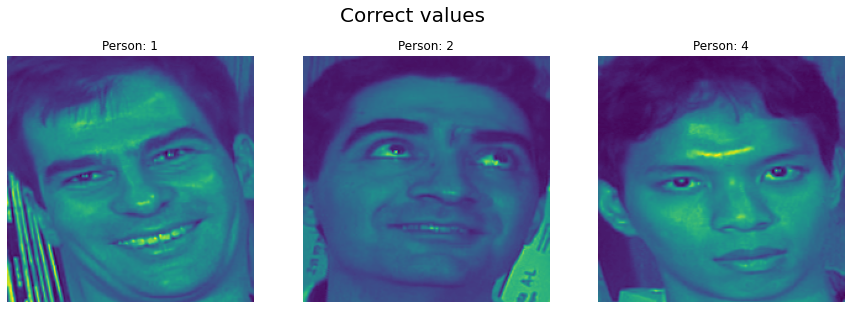

In [8]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)

fig.suptitle('Correct values', fontsize=20)
ax[0].imshow(test_data[2]);
ax[0].set_title("Person: " + str(y_test[2]));
ax[0].axis('off');

ax[1].imshow(test_data[9]);
ax[1].set_title("Person: " + str(y_test[9]));
ax[1].axis('off');

ax[2].imshow(test_data[15]);
ax[2].set_title("Person: " + str(y_test[15]));
ax[2].axis('off');

In [9]:
predicted_1 = eigenfaces.predict(test_data[2])
predicted_2 = eigenfaces.predict(test_data[9])
predicted_3 = eigenfaces.predict(test_data[15])

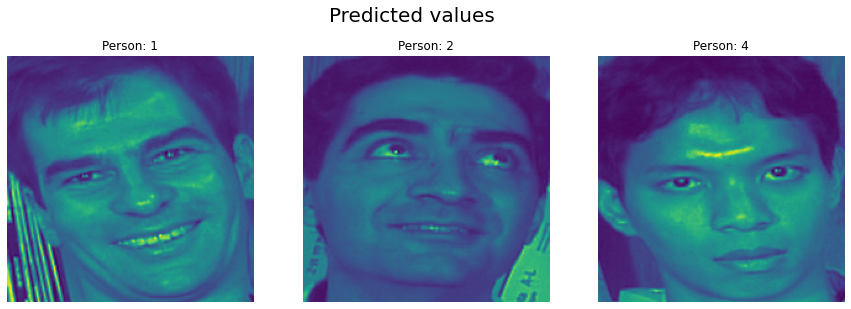

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
fig.suptitle('Predicted values', fontsize=20)


ax[0].imshow(test_data[2]);
ax[0].set_title("Person: " + str(predicted_1[0]));
ax[0].axis('off');

ax[1].imshow(test_data[9]);
ax[1].set_title("Person: " + str(predicted_2[0]));
ax[1].axis('off');

ax[2].imshow(test_data[15]);
ax[2].set_title("Person: " + str(predicted_3[0]));
ax[2].axis('off');

#### Calculating the accuracy score

In [11]:
eigenfaces_predicted_values = []
for i in test_data:
    eigenfaces_predicted_values.append(eigenfaces.predict(i)[0])

accuracy_eigenfaces = accuracy_score(y_test, eigenfaces_predicted_values)
print('Eigenfaces correctly predicted {:.2f}% of the data. '.format(accuracy_eigenfaces*100))

Eigenfaces correctly predicted 72.40% of the data. 


***

### Fisherfaces

In [12]:
t1 = datetime.now()
fisherfaces = cv2.face.FisherFaceRecognizer_create()
fisherfaces.train(training_data, y_train)
t2 = datetime.now()

print('Trained model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))

Trained model. The training process lasted 14.425858 seconds.


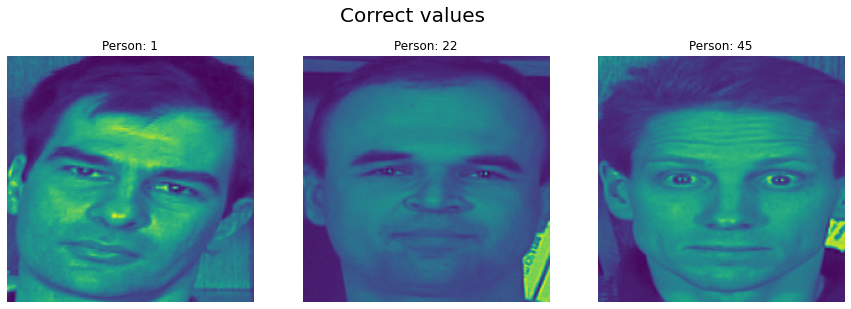

In [13]:
#trying do predict
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)

fig.suptitle('Correct values', fontsize=20)
ax[0].imshow(test_data[0]);
ax[0].set_title("Person: " + str(y_test[0]));
ax[0].axis('off');

ax[1].imshow(test_data[107]);
ax[1].set_title("Person: " + str(y_test[107]));
ax[1].axis('off');

ax[2].imshow(test_data[220]);
ax[2].set_title("Person: " + str(y_test[220]));
ax[2].axis('off');

In [14]:
predicted_1 = fisherfaces.predict(test_data[0])
predicted_2 = fisherfaces.predict(test_data[107])
predicted_3 = fisherfaces.predict(test_data[220])

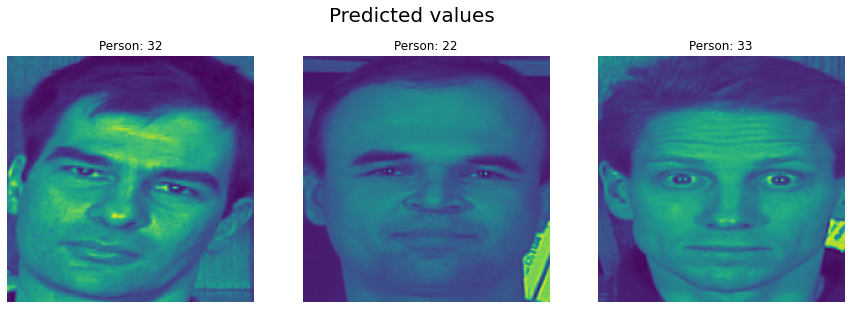

In [15]:
#trying do predict
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
fig.suptitle('Predicted values', fontsize=20)


ax[0].imshow(test_data[0]);
ax[0].set_title("Person: " + str(predicted_1[0]));
ax[0].axis('off');

ax[1].imshow(test_data[107]);
ax[1].set_title("Person: " + str(predicted_2[0]));
ax[1].axis('off');

ax[2].imshow(test_data[220]);
ax[2].set_title("Person: " + str(predicted_3[0]));
ax[2].axis('off');

#### Calculating the accuracy score

In [16]:
fisherfaces_predicted_values = []
for i in test_data:
    fisherfaces_predicted_values.append(fisherfaces.predict(i)[0])

accuracy_fisherfaces = accuracy_score(y_test, fisherfaces_predicted_values)
print('Fisherfaces correctly predicted {:.2f}% of the data. '.format(accuracy_fisherfaces*100))


Fisherfaces correctly predicted 52.00% of the data. 


***

### LBPH

In [17]:
t1 = datetime.now()
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(training_data, y_train)
t2 = datetime.now()

print('Trained model. The training process lasted {} seconds.'.format((t2-t1).total_seconds()))

Trained model. The training process lasted 1.732344 seconds.


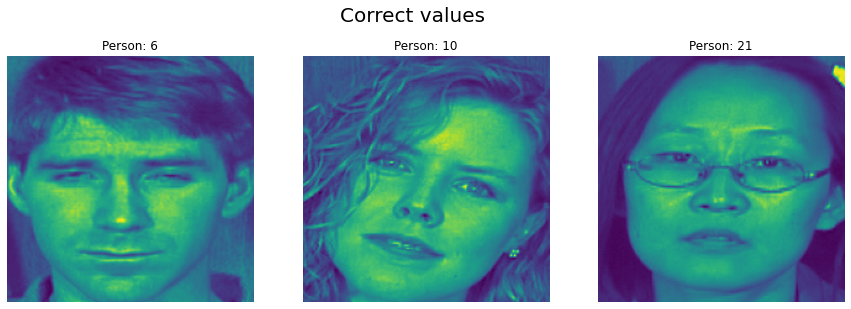

In [18]:
#trying do predict
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)

fig.suptitle('Correct values', fontsize=20)
ax[0].imshow(test_data[29]);
ax[0].set_title("Person: " + str(y_test[29]));
ax[0].axis('off');

ax[1].imshow(test_data[49]);
ax[1].set_title("Person: " + str(y_test[49]));
ax[1].axis('off');

ax[2].imshow(test_data[104]);
ax[2].set_title("Person: " + str(y_test[104]));
ax[2].axis('off');

In [19]:
predicted_1 = lbph.predict(test_data[29])
predicted_2 = lbph.predict(test_data[49])
predicted_3 = lbph.predict(test_data[104])

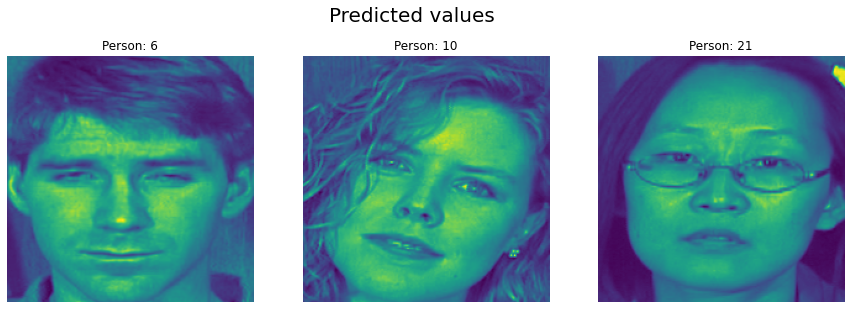

In [20]:
#trying do predict
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
fig.suptitle('Predicted values', fontsize=20)


ax[0].imshow(test_data[29]);
ax[0].set_title("Person: " + str(predicted_1[0]));
ax[0].axis('off');

ax[1].imshow(test_data[49]);
ax[1].set_title("Person: " + str(predicted_2[0]));
ax[1].axis('off');

ax[2].imshow(test_data[104]);
ax[2].set_title("Person: " + str(predicted_3[0]));
ax[2].axis('off');

#### Calculating the accuracy score

In [21]:
lbph_predicted_values = []
for i in test_data:
    lbph_predicted_values.append(lbph.predict(i)[0])

accuracy_lbph = accuracy_score(y_test, lbph_predicted_values)
print('LBPH correctly predicted {:.2f}% of the data. '.format(accuracy_lbph*100))

LBPH correctly predicted 79.20% of the data. 


***
# Results

In conclusion, this project explored three facial recognition techniques: Eigenfaces, Fisherfaces, and LBPH. Each algorithm was implemented using the OpenCV library. The results were evaluated in terms of accuracy.

The results were 79.2% for the LBPH algorithm, 72.4% for the Eigenfaces algorithm, and 52% for the Fisherfaces algorithm.

The LBPH algorithm also obtained a better result in training time, taking only 1.73 seconds while Eigenfaces took 25.56 seconds and Fisherfaces took 14.42 seconds.

Overall, these results suggest that the LBPH model is the best choice for this particular facial recognition task. However, it is important to note that results may vary depending on the dataset and specific problem conditions.

